In [4]:
 %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import imutils

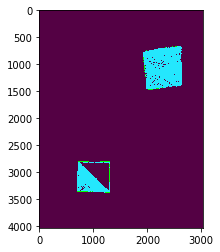

In [108]:
def find_shapes(image):
    im = cv2.imread(image)
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(imgray, (5, 5), 0)
    ret,thresh = cv2.threshold(blurred,100,255,0)
    resized = imutils.resize(thresh, width=300)
    ratio = im.shape[0] / float(resized.shape[0])
    
    im2, contours, hierarchy = cv2.findContours(resized.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cv2.findContours(resized.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    for c in cnts:
        c = c.astype("float")
        c *= ratio
        c = c.astype("int")
        cv2.drawContours(im, [c], -1, (0, 255, 0), 2)
    plt.imshow(im)
    return im 
    
answer = find_shapes('filtered.png') 


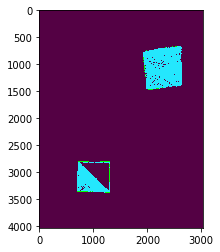

In [112]:
points_of_interest = []

def find_shapes(image):
    im = cv2.imread(image)
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(imgray, (5, 5), 0)
    ret,thresh = cv2.threshold(blurred,100,255,0)
    resized = imutils.resize(thresh, width=300)
    ratio = im.shape[0] / float(resized.shape[0])
    
    im2, contours, hierarchy = cv2.findContours(resized.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnts = cv2.findContours(resized.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]
    for c in cnts:
        c = c.astype("float")
        c *= ratio
        c = c.astype("int")
        points_of_interest.append(c)
        cv2.drawContours(im, [c], -1, (0, 255, 0), 2)
    plt.imshow(im)
    return im 
    
answer = find_shapes('filtered.png') 

In [131]:
import Image
im = Image.open("filtered.png")
img2 = im.crop((0, 0, 201, 335))
plt.imshow(img2)

# for i in points_of_interest:
#     point = i[0]
#     zeros[point[0]][point[1]] = 255
# plt.imshow(zeros)

ImportError: No module named 'Image'

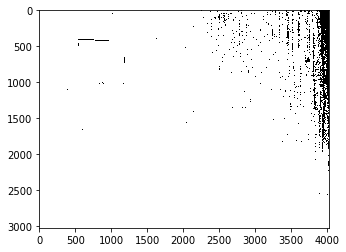

In [74]:
def try_image(image):
    im = cv2.imread(image)
    imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(imgray,95,255,0)
    im = thresh
    params = cv2.SimpleBlobDetector_Params()
    # Change thresholds
    params.minThreshold = 0;    # the graylevel of images
    params.maxThreshold = 255;

    params.filterByColor = False
    params.blobColor = 255

    # Filter by Area
    params.filterByArea = True
    params.minArea = 100

    detector = cv2.SimpleBlobDetector_create(params)


    # Detect blobs.
    keypoints = detector.detect(im)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Show keypoints
    plt.imshow(im_with_keypoints)
try_image('zero_board.jpg')

In [106]:
im = cv2.imread("black.png")
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 3)

ValueError: too many values to unpack (expected 2)

148.8243763364962


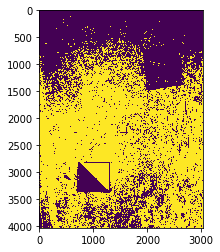

In [6]:
import mahotas
im = cv2.imread('new_board.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
photo = imgray.astype(np.uint8)
from pylab import imshow, gray, show
T_rc = mahotas.rc(photo)
print(T_rc)
imshow(photo > T_rc)
show()


In [7]:
import mahotas as mh
labeled, n_nucleus  = mh.label(photo > T_rc)
print('Found {} nuclei.'.format(n_nucleus))

Found 16483 nuclei.


In [82]:
labeled, n_nucleus  = mh.label(f)
print('Found {} nuclei.'.format(n_nucleus))

Found 1153 nuclei.


Found 1153 nuclei.


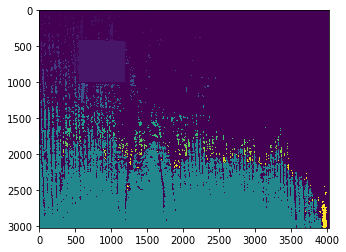

In [83]:
labeled, n_nucleus  = mh.label(f)
print('Found {} nuclei.'.format(n_nucleus))
imshow(labeled)
show()

In [29]:
#im = cv2.imread('new_board.jpg')
#imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
imray = mahotas.imread('new_board.jpg',as_type='grey')
photo = imray.astype(np.uint8)
T_rc = mh.rc(photo)
photo = photo > T_rc
photo = np.invert(photo)
imshow(photo)
show()


TypeError: imread() got an unexpected keyword argument 'as_type'

Found 1775 nuclei.


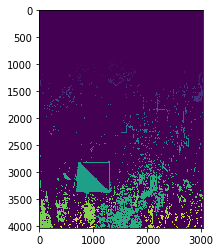

In [24]:
labeled, n_nucleus  = mh.label(photo)
print('Found {} nuclei.'.format(n_nucleus))
imshow(labeled)
show()